In [97]:
!pip install matplotlib

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv('../datasets/sentiment_analysis.csv')

In [100]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [101]:
#Data Preprocessing

In [102]:
data.shape

(7920, 3)

In [103]:
#duplicate thiyanwada balamu
data.duplicated().sum()

np.int64(0)

In [104]:
#check if have null values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [105]:
# Text Preprocessing

In [106]:
import re
import string

In [107]:
# convert uppercase to lowercase

In [108]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [109]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [110]:
#Remove Links

In [111]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '',x,flags=re.MULTILINE) for x in x.split()))

In [112]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [113]:
#Remove punctuations

In [114]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [115]:
data['tweet'] = data['tweet'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [116]:
data['tweet'].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [117]:
#Remove Numbers

In [118]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [119]:
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r'\d+', '', x)) 

In [120]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [121]:
#Remove Stopwords

In [122]:
!pip install nltk

In [123]:
import nltk

In [124]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [125]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [126]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [127]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw)) 

In [128]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [129]:
# Stemming

In [130]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# Example usage
data['tweet'] = data['tweet'].apply(lambda x: " ".join([ps.stem(word) for word in x.split()]))

In [131]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [132]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [133]:
#Dan text Numeric value walata harawanna ona

In [134]:
# Building Vocabulary

In [135]:
from collections import Counter
Vocab = Counter()

In [136]:
# vocab.update(['java', 'python', 'python', 'c++'])  Word Count ek balagann mehem krnne meka example ekak

In [137]:
Vocab

Counter()

In [138]:
for sentence in data['tweet']:
    Vocab.update(sentence.split())

In [139]:
Vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [140]:
len(Vocab)

15949

In [141]:
tokens = [key for key in Vocab if Vocab[key] > 20]

In [142]:
len(tokens)

656

In [143]:
tokens

['android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batteri',
 'charg',
 'saturday',
 'summer',
 'like',
 'share',
 'want',

In [144]:
# tokens tika location ekaka save kara gamu
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding = 'utf-8')
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [145]:
# dan me sentence use karala numerical value widihata hadaganna onaa
# Divide Dataset
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [146]:
x = data['tweet']
y = data['label']

In [147]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [148]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [149]:
!pip install scikit-learn

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [151]:
x_train.shape

(6336,)

In [152]:
x_test.shape

(1584,)

In [153]:
# Vectorization

In [154]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray(vectorized_list, dtype = np.float32)

    return vectorized_list_new

In [155]:
vectorized_x_train = vectorizer(x_train, tokens)

In [156]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 656), dtype=float32)

In [157]:
vectorized_x_test = vectorizer(x_test, tokens)

In [158]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 656), dtype=float32)

In [159]:
y_train.value_counts() 

label
0    4706
1    1630
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1ba6f5aefd0>,
 [Text(-0.759876178452556, 0.7953541308249675, 'Positive'),
  Text(0.7598760583574147, -0.7953542455630692, 'Negative')])

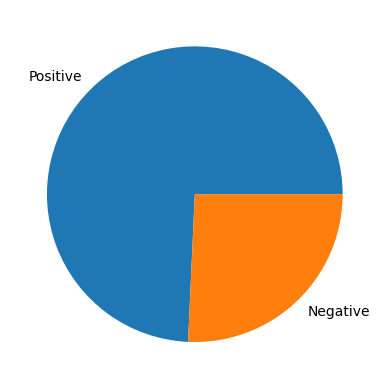

In [160]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['Positive', 'Negative'])

In [161]:
#data set ek in balance
#Haddle 

In [162]:
!pip install imbalanced-learn

In [163]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9412, 656) (9412,)


In [164]:
y_train_smote.value_counts()

label
0    4706
1    4706
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1ba6f5d6ad0>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'Positive'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'Negative')])

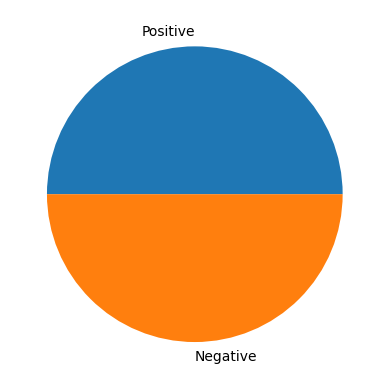

In [165]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['Positive', 'Negative'])

In [166]:
vectorized_x_train_smote #train karanne denne mew

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9412, 656), dtype=float32)

In [167]:
y_train_smote #train karanne denne mew

0       0
1       1
2       0
3       0
4       0
       ..
9407    1
9408    1
9409    1
9410    1
9411    1
Name: label, Length: 9412, dtype: int64

In [168]:
vectorized_x_test #Test karanne denne me deka

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 656), dtype=float32)

In [169]:
y_test #Test karanne denne me deka

6870    0
5213    0
629     1
2079    0
6886    0
       ..
3363    0
248     1
5178    1
2465    0
7031    0
Name: label, Length: 1584, dtype: int64

In [170]:
# Model Training and Evaluation

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [172]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec =  round(recall_score(y_act, y_pred), 3)
    f1 =  round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores: \n\tAcuuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec =  round(recall_score(y_act, y_pred), 3)
    f1 =  round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores: \n\tAcuuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [173]:
# LOGISTIC REGRESSION

In [174]:
LR = LogisticRegression()
LR.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [175]:
y_train_pred = LR.predict(vectorized_x_train_smote)

In [176]:
y_train_pred

array([0, 1, 0, ..., 1, 1, 1], shape=(9412,))

In [177]:
 y_train_smote

0       0
1       1
2       0
3       0
4       0
       ..
9407    1
9408    1
9409    1
9410    1
9411    1
Name: label, Length: 9412, dtype: int64

In [178]:
training_scores(y_train_smote, y_train_pred)

Training Scores: 
	Acuuracy = 0.916
	Precision = 0.891
	Recall = 0.947
	F1-Score = 0.918


In [179]:
y_test_pred = LR.predict(vectorized_x_test)

In [180]:
y_test_pred

array([0, 0, 1, ..., 0, 0, 1], shape=(1584,))

In [181]:
y_test

6870    0
5213    0
629     1
2079    0
6886    0
       ..
3363    0
248     1
5178    1
2465    0
7031    0
Name: label, Length: 1584, dtype: int64

In [182]:
validation_scores(y_test,y_test_pred)

Testing Scores: 
	Acuuracy = 0.888
	Precision = 0.714
	Recall = 0.922
	F1-Score = 0.805


In [183]:
LR = LogisticRegression()
LR.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = LR.predict(vectorized_x_train_smote)
y_test_pred = LR.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores: 
	Acuuracy = 0.916
	Precision = 0.891
	Recall = 0.947
	F1-Score = 0.918
Testing Scores: 
	Acuuracy = 0.888
	Precision = 0.714
	Recall = 0.922
	F1-Score = 0.805


In [184]:
# MultinomialNB

In [185]:
Mnb = MultinomialNB()
Mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = Mnb.predict(vectorized_x_train_smote)
y_test_pred = Mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores: 
	Acuuracy = 0.885
	Precision = 0.855
	Recall = 0.928
	F1-Score = 0.89
Testing Scores: 
	Acuuracy = 0.869
	Precision = 0.672
	Recall = 0.929
	F1-Score = 0.78


In [186]:
# DecisionTreeClassifier

In [187]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores: 
	Acuuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Testing Scores: 
	Acuuracy = 0.833
	Precision = 0.659
	Recall = 0.692
	F1-Score = 0.675


In [188]:
# RandomForestClassifier

In [189]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores: 
	Acuuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Testing Scores: 
	Acuuracy = 0.87
	Precision = 0.74
	Recall = 0.74
	F1-Score = 0.74


In [190]:
#  SVM

In [191]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores: 
	Acuuracy = 0.968
	Precision = 0.947
	Recall = 0.993
	F1-Score = 0.969
Testing Scores: 
	Acuuracy = 0.896
	Precision = 0.751
	Recall = 0.874
	F1-Score = 0.807


In [192]:
# Logistic regression ek use krmu. eka dn save krgen inn ona

In [193]:
import pickle
with open('../static/model/model.pickle', 'wb')as file:
    pickle.dump(LR, file)
